# LAB 2

In [1]:
import cv2  # pip install
import numpy as np  # pip install
import glob
import matplotlib.pyplot as plt # pip install
from scipy.spatial import distance as dist  # pip install

In [2]:
!pip3 install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!conda install -c conda-forge opencv

In [2]:
glob.glob("./data/*.jpg")

['./data/hulk.jpg',
 './data/ironman.jpg',
 './data/magnetto.jpg',
 './data/spiderman.jpg',
 './data/venom.jpg',
 './data/wolverine.jpg',
 './data/wonderwoman.jpg',
 './data/wonderwoman2.jpg']

In [5]:
glob.glob('./data/hulk.jpg')

['./data/hulk.jpg']

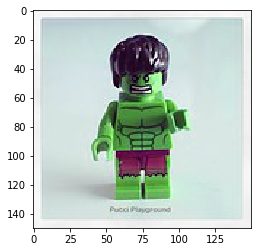

In [7]:
ph = glob.glob('./data/hulk.jpg')[0]

image = cv2.imread(ph)
filename = ph.split("\\")[-1]
plt.imshow(image)

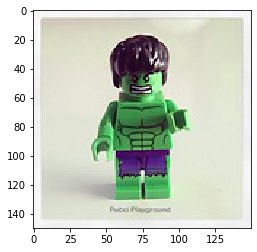

In [9]:
cvt_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(cvt_image)

In [18]:
hist = cv2.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
hist.shape

(8, 8, 8)

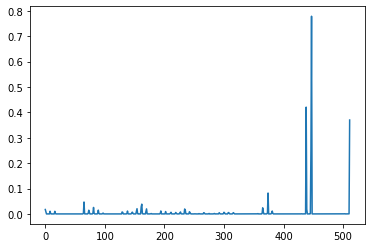

In [21]:
hist = cv2.normalize(hist,hist).flatten()
plt.plot(hist)

In [16]:

hist.shape

(512,)

In [4]:
images = {}
index = {}
for path in glob.glob("./data/*.jpg"):
#     print(path)
    image = cv2.imread(path)
    filename = path.split("/")[-1]
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
    hist = cv2.normalize(hist,hist).flatten()
    index[filename] = hist
    print(filename)

hulk.jpg
ironman.jpg
magnetto.jpg
spiderman.jpg
venom.jpg
wolverine.jpg
wonderwoman.jpg
wonderwoman2.jpg


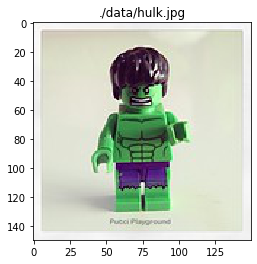

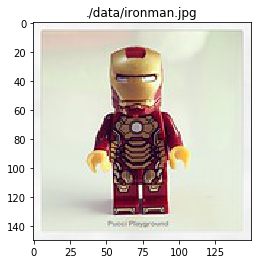

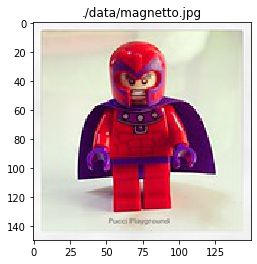

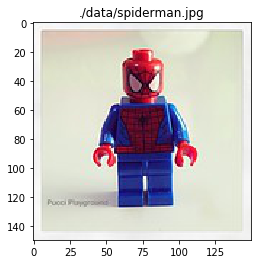

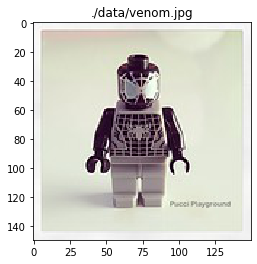

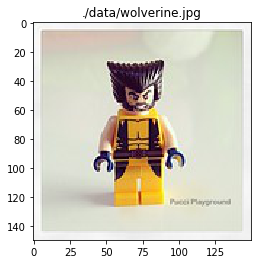

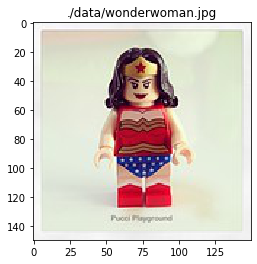

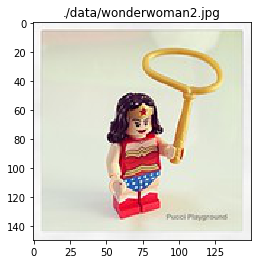

In [24]:
for k,v in images.items():
    plt.figure()
    plt.title(k)
    plt.imshow(v)

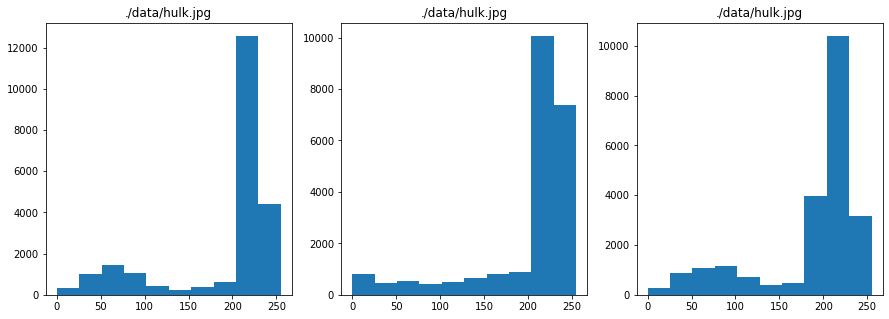

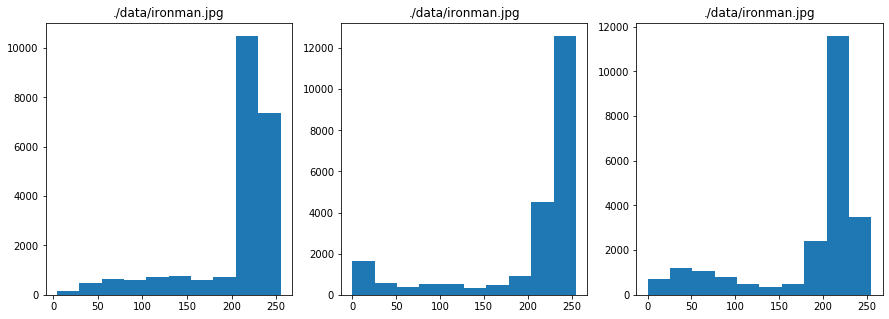

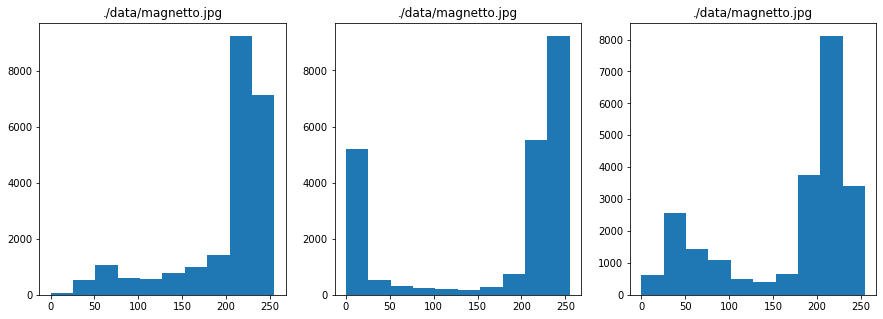

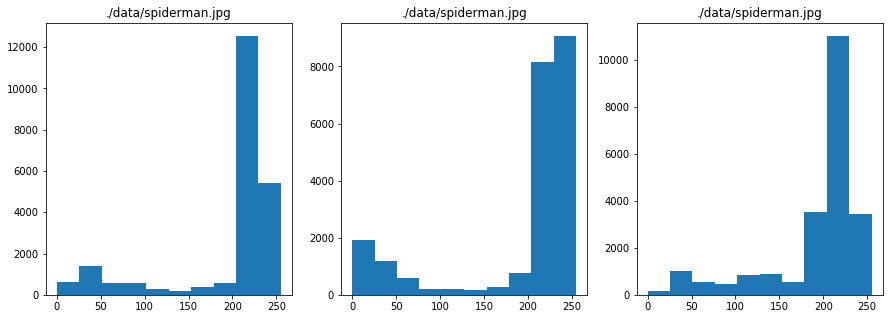

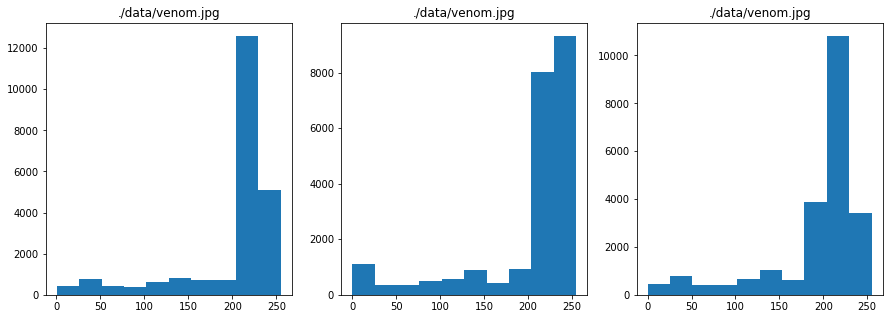

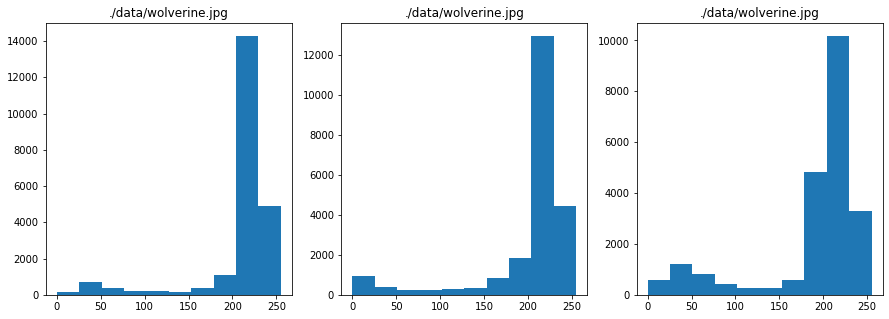

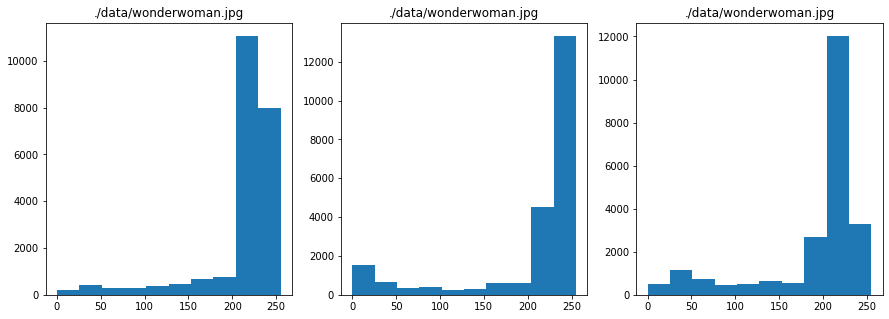

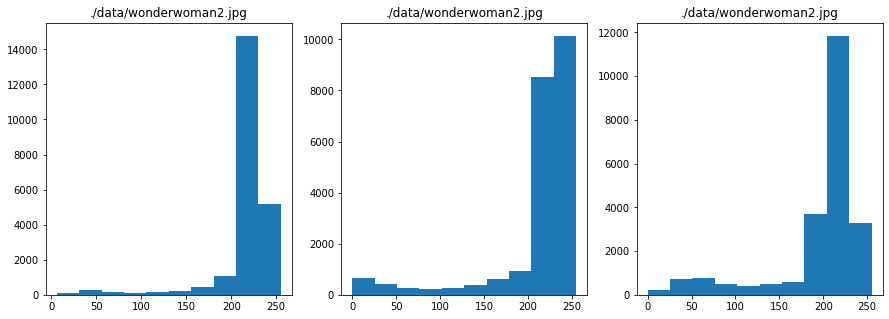

In [25]:
for k,v in images.items():
    plt.figure(figsize=(15,5))
    ax1 = plt.subplot(1,3,1)
    ax1.set_title(k)
    ax1.hist(v[:,:,0].flatten())
    ax2 = plt.subplot(1,3,2)
    ax2.set_title(k)
    ax2.hist(v[:,:,1].flatten())
    ax3 = plt.subplot(1,3,3)
    ax3.set_title(k)
    ax3.hist(v[:,:,2].flatten())    

Euc <function euclidean at 0x7fc8aa5b1200>
Taxi <function cityblock at 0x7fc8aa5b1680>


/home/sultan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


Cheb <function chebyshev at 0x7fc8aa5b17a0>


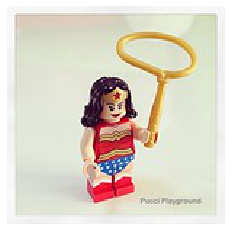

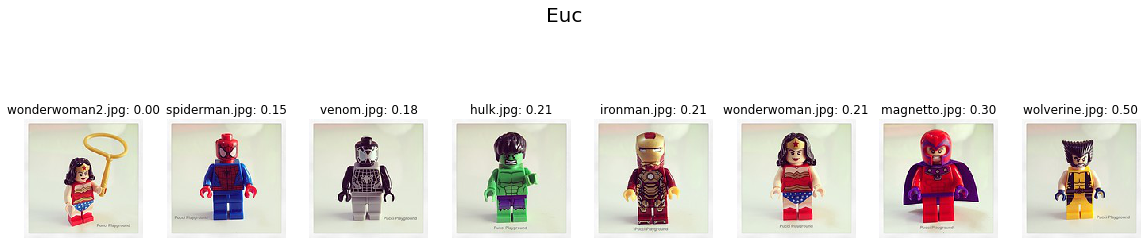

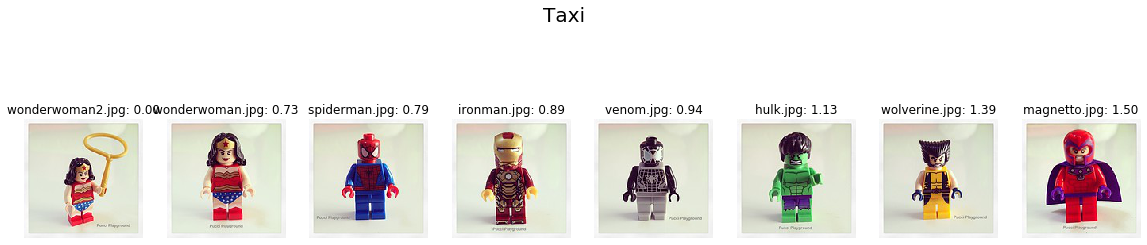

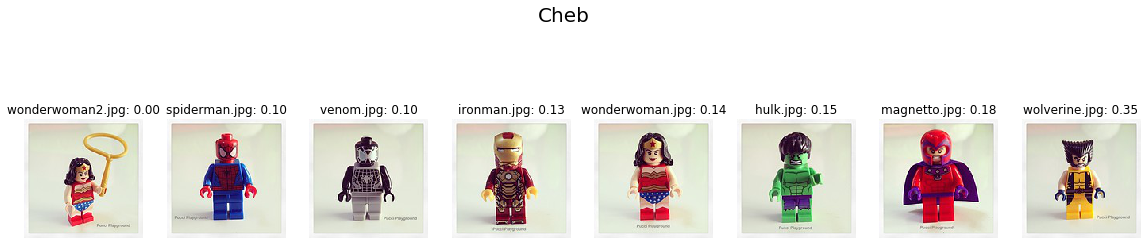

In [5]:
METRICS = (
    ("Euc",dist.euclidean),
    ("Taxi",dist.cityblock),
    ("Cheb",dist.chebyshev)
)

for name,method in METRICS:
    print(name,method)
    result = {}
    for k,hist in index.items():
        d = method(index["wonderwoman2.jpg"], hist)
        result[k] = d
    result = sorted([(v,k) for k,v in result.items()])
#     print(result)
    figure = plt.figure("Query")
    ax1 = figure.add_subplot(1,1,1)
    ax1.imshow(images["wonderwoman2.jpg"])
    plt.axis("off")
    fig = plt.figure("Results: %s" % (name), figsize=(20,5))
    fig.suptitle(name, fontsize = 20)
    for i,(v,k) in enumerate(result):
        ax = fig.add_subplot(1, len(images),i+1)
        ax.set_title("%s: %.2f" % (k,v))
        plt.imshow(images[k])
        plt.axis("off")
        

# HOMEWORK

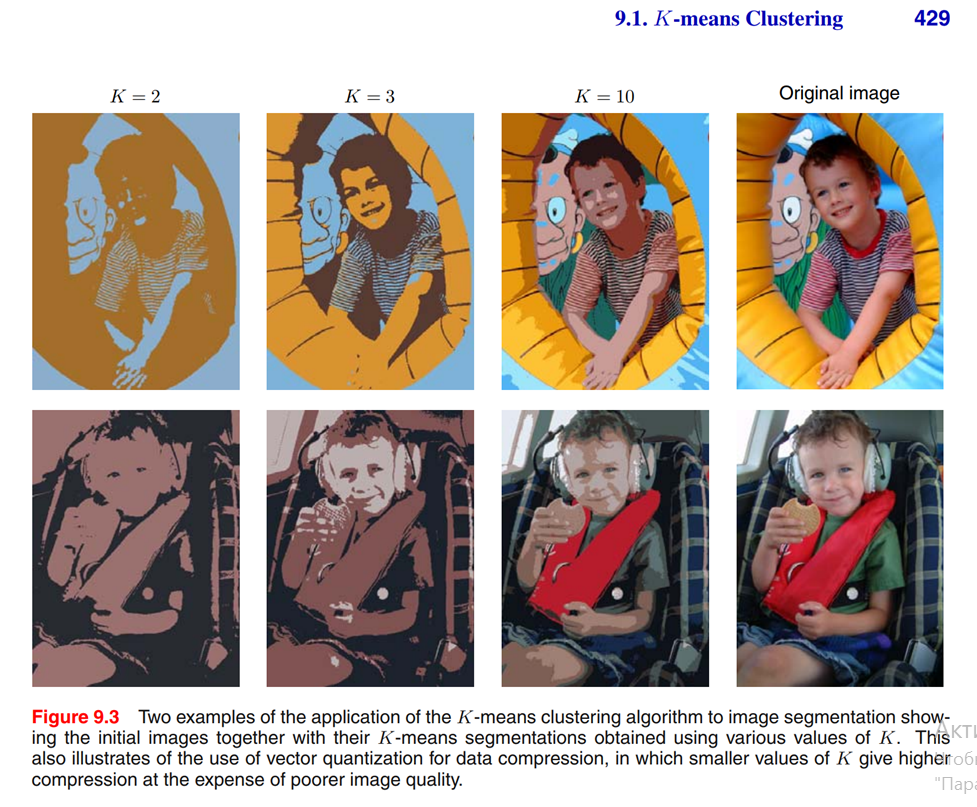

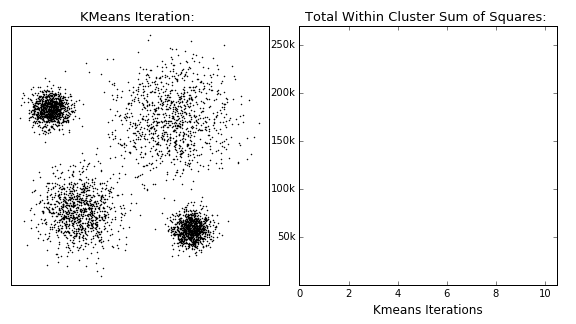

## Introduction to K-Means Clustering
* Step 1: Choose the number of clusters k. ...
* Step 2: Select k random points from the data as centroids. ...
* Step 3: Assign all the points to the closest cluster centroid. ...
* Step 4: Recompute the centroids of newly formed clusters. ...
* Step 5: Repeat steps 3 and 4.

### Task
* Read 9.1 - KMeans of Bishop book

* Develop the code of the K-means clustering algorithm for Image Segmentation. In Fig.9.3 you can see an example of the final processing result. You should use only the NumPy library. Test your implementation against k = [2,3,10]. Visualize your result. Write a conclusion about the complexity of your implementation and the quality of image compression. Don't use copy-past from the internet, cause it deserves zero marks.


In [62]:
import numpy as np
from numpy.linalg import norm

class KMeans():
    def __init__(self, k, max_iter=100):
        self.k = k # Amount of classes
        self.max_iter = max_iter
        
    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.k))
        for k in range(self.k):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance
    
    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.k, X.shape[1]))
        for k in range(self.k):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids
    
    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.k):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, data):
        self.data = data
        #Put your code here for 
        # 1.centroid init
#         centroids = np.array([])
        random_idx = np.random.permutation(self.data.shape[0])
        self.centroids = self.data[random_idx[:self.k]]
        # 2.iterations through data points and evaluation of centroids' positions

        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(self.data, old_centroids)
            self.labels = np.argmin(distance, axis=1)
            self.centroids = self.compute_centroids(self.data, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(self.data, self.labels, self.centroids)
                
                

    def classify(self):
        # np.random.randint(0, high = 255,size=3)
        distance = self.compute_distance(self.data, self.centroids)
        centroids_labels = np.argmin(distance, axis=1)
        # self.closest_cluster(self.find_distance(self.data, self.centroids))
        seg = self.data
        for i in range(len(self.data)):
            seg[i] = self.centroids[centroids_labels][i]   
        return seg.reshape(150, 150, 3)
        
    

In [60]:
km = KMeans(3)
km.fit(np.array(data[0]))

In [61]:
km.classify()

array([[224, 227, 212],
       [224, 227, 212],
       [224, 227, 212],
       ...,
       [224, 227, 212],
       [224, 227, 212],
       [224, 227, 212]], dtype=uint8)

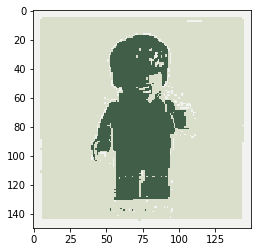

In [63]:
km = KMeans(3)
km.fit(np.array(data[0]))

plt.imshow(km.classify())

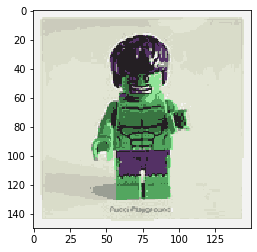

In [64]:
km = KMeans(10)
km.fit(np.array(data[0]))

plt.imshow(km.classify())

In [27]:
[k for k in images.keys()]

['hulk.jpg',
 'ironman.jpg',
 'magnetto.jpg',
 'spiderman.jpg',
 'venom.jpg',
 'wolverine.jpg',
 'wonderwoman.jpg',
 'wonderwoman2.jpg']

In [28]:
images["hulk.jpg"].reshape((-1,3))

array([[245, 247, 244],
       [251, 253, 250],
       [247, 247, 245],
       ...,
       [240, 240, 240],
       [241, 241, 241],
       [241, 241, 241]], dtype=uint8)

In [6]:
# Input data
data = [images["hulk.jpg"].reshape((-1,3)) for k in images.keys()]

In [9]:
np.array(data).shape

(8, 22500, 3)

In [27]:
kmeans = KMeans(2)
kmeans.fit(data[0])

#Make the classify for every point in the original image and substitute the color with the result of classify()
kmeans.classify(None)

array([ 85, 184,  32])

In [28]:
# Visualize the result image 
# Put your code here